In [1]:
# Install roboflow in Google Colab
!pip install roboflow

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 88.6/88.6 kB 5.5 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 66.8/66.8 kB 6.8 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 49.9/49.9 MB 21.1 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.4/1.4 MB 81.9 MB/s eta 0:00:00
   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 4.2/4.2 MB 119.3 MB/s eta 0:00:00
  Attempting uninstall: opencv-python-headless
    Found existing installation: opencv-python-headless 4.12.0.88
    Uninstalling opencv-python-headless-4.12.0.88:
      Successfully uninstalled opencv-python-headless-4.12.0.88
  Attempting uninstall: idna
    Found existing installation: idna 3.10
    Uninstalling idna-3.10:
      Successfully uninstalled idna-3.10


In [2]:
# Install required packages
!pip install ultralytics roboflow

import os
import yaml
from ultralytics import YOLO
import matplotlib.pyplot as plt
from IPython.display import Image, display

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 1.1/1.1 MB 27.9 MB/s eta 0:00:00
Creating new Ultralytics Settings v0.0.6 file ✅ 
View Ultralytics Settings with 'yolo settings' or at '/root/.config/Ultralytics/settings.json'
Update Settings with 'yolo settings key=value', i.e. 'yolo settings runs_dir=path/to/dir'. For help see https://docs.ultralytics.com/quickstart/#ultralytics-settings.


In [3]:
from roboflow import Roboflow

rf = Roboflow(api_key="UbDBkUJQ5Mpf9FEwtL0s")
project = rf.workspace("fyp-mebr9").project("chili-ripeness-cluvp")
version = project.version(1)
dataset = version.download("yolov8")

loading Roboflow workspace...
loading Roboflow project...



Extracting Dataset Version Zip to CHILI-RIPENESS-1 in yolov8:: 100%|██████████| 1378/1378 [00:00<00:00, 8096.84it/s]


In [4]:
# Get the dataset path
dataset_path = "/content/CHILI-RIPENESS-1"
print(f"Dataset downloaded to: {dataset_path}")


Dataset downloaded to: /content/CHILI-RIPENESS-1


In [5]:
# Create data.yaml file for YOLOv8
data_yaml_content = f"""
path: {dataset_path}  # dataset root dir
train: train/images  # train images (relative to 'path')
val: valid/images    # val images (relative to 'path')
test: test/images    # test images (optional, relative to 'path')

# Classes
nc: 3  # number of classes
names: ['overripe', 'ripe', 'unripe']  # class names
"""

In [6]:

# Save the data.yaml file
data_yaml_path = os.path.join(dataset_path, 'data.yaml')
with open(data_yaml_path, 'w') as f:
    f.write(data_yaml_content)

print("Created data.yaml file")

# Initialize YOLOv8 model
# You can choose different model sizes: yolov8n.pt (nano), yolov8s.pt (small), yolov8m.pt (medium), yolov8l.pt (large), yolov8x.pt (xlarge)
model = YOLO('yolov8n.pt')  # Using nano model for faster training in Colab


Created data.yaml file


In [7]:
training_params = {
    'data': data_yaml_path,
    'epochs': 100,  # Adjust based on your needs
    'imgsz': 640,   # Image size
    'batch': 16,    # Batch size - adjust based on your GPU memory
    'workers': 2,   # Number of worker threads
    'patience': 50, # Early stopping patience
    'save': True,   # Save checkpoints
    'plots': True,  # Generate training plots
    'device': 0,    # Use GPU if available, 'cpu' for CPU only
    'project': 'chili_ripeness_training',  # Project name
    'name': 'chili_yolov8_exp1',  # Experiment name
    'exist_ok': True,  # Allow overwriting existing project
    'pretrained': True,  # Use pretrained weights
    'optimizer': 'AdamW',  # Optimizer
    'lr0': 0.01,    # Initial learning rate
    'weight_decay': 0.0005,  # Weight decay
    'warmup_epochs': 3,  # Warmup epochs
    'box': 7.5,     # Box loss gain
    'cls': 0.5,     # Classification loss gain
    'dfl': 1.5,     # Distribution focal loss gain
    'hsv_h': 0.015, # Image HSV-Hue augmentation
    'hsv_s': 0.7,   # Image HSV-Saturation augmentation
    'hsv_v': 0.4,   # Image HSV-Value augmentation
    'degrees': 0.0, # Image rotation
    'translate': 0.1, # Image translation
    'scale': 0.5,   # Image scale
    'shear': 0.0,   # Image shear
    'perspective': 0.0, # Image perspective
    'flipud': 0.0,  # Image flip up-down
    'fliplr': 0.5,  # Image flip left-right
    'mosaic': 1.0,  # Image mosaic
    'mixup': 0.0,   # Image mixup
}

In [8]:
# Start training
print("Starting training...")
print(f"Training parameters: {training_params}")


Starting training...
Training parameters: {'data': '/content/CHILI-RIPENESS-1/data.yaml', 'epochs': 100, 'imgsz': 640, 'batch': 16, 'workers': 2, 'patience': 50, 'save': True, 'plots': True, 'device': 0, 'project': 'chili_ripeness_training', 'name': 'chili_yolov8_exp1', 'exist_ok': True, 'pretrained': True, 'optimizer': 'AdamW', 'lr0': 0.01, 'weight_decay': 0.0005, 'warmup_epochs': 3, 'box': 7.5, 'cls': 0.5, 'dfl': 1.5, 'hsv_h': 0.015, 'hsv_s': 0.7, 'hsv_v': 0.4, 'degrees': 0.0, 'translate': 0.1, 'scale': 0.5, 'shear': 0.0, 'perspective': 0.0, 'flipud': 0.0, 'fliplr': 0.5, 'mosaic': 1.0, 'mixup': 0.0}


In [9]:
# Train the model
results = model.train(**training_params)


Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
engine/trainer: agnostic_nms=False, amp=True, augment=False, auto_augment=randaugment, batch=16, bgr=0.0, box=7.5, cache=False, cfg=None, classes=None, close_mosaic=10, cls=0.5, conf=None, copy_paste=0.0, copy_paste_mode=flip, cos_lr=False, cutmix=0.0, data=/content/CHILI-RIPENESS-1/data.yaml, degrees=0.0, deterministic=True, device=0, dfl=1.5, dnn=False, dropout=0.0, dynamic=False, embed=None, epochs=100, erasing=0.4, exist_ok=True, fliplr=0.5, flipud=0.0, format=torchscript, fraction=1.0, freeze=None, half=False, hsv_h=0.015, hsv_s=0.7, hsv_v=0.4, imgsz=640, int8=False, iou=0.7, keras=False, kobj=1.0, line_width=None, lr0=0.01, lrf=0.01, mask_ratio=4, max_det=300, mixup=0.0, mode=train, model=yolov8n.pt, momentum=0.937, mosaic=1.0, multi_scale=False, name=chili_yolov8_exp1, nbs=64, nms=False, opset=None, optimize=False, optimizer=AdamW, overlap_mask=True, patience=50, perspective=0.0, plots=True, pose=

Overriding model.yaml nc=80 with nc=3

                   from  n    params  module                                       arguments                     
  0                  -1  1       464  ultralytics.nn.modules.conv.Conv             [3, 16, 3, 2]                 
  1                  -1  1      4672  ultralytics.nn.modules.conv.Conv             [16, 32, 3, 2]                
  2                  -1  1      7360  ultralytics.nn.modules.block.C2f             [32, 32, 1, True]             
  3                  -1  1     18560  ultralytics.nn.modules.conv.Conv             [32, 64, 3, 2]                
  4                  -1  2     49664  ultralytics.nn.modules.block.C2f             [64, 64, 2, True]             
  5                  -1  1     73984  ultralytics.nn.modules.conv.Conv             [64, 128, 3, 2]               
  6                  -1  2    197632  ultralytics.nn.modules.block.C2f             [128, 128, 2, True]           
  7                  -1  1    295424  ultralytics

Model summary: 129 layers, 3,011,433 parameters, 3,011,417 gradients, 8.2 GFLOPs

Transferred 319/355 items from pretrained weights
Freezing layer 'model.22.dfl.conv.weight'
AMP: running Automatic Mixed Precision (AMP) checks...


AMP: checks passed ✅
train: Fast image access ✅ (ping: 0.0±0.0 ms, read: 1465.5±804.5 MB/s, size: 49.1 KB)


train: Scanning /content/CHILI-RIPENESS-1/train/labels... 600 images, 0 backgrounds, 0 corrupt: 100%|██████████| 600/600 [00:00<00:00, 2516.82it/s]

train: New cache created: /content/CHILI-RIPENESS-1/train/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 51, len(boxes) = 1193. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 454.2±48.9 MB/s, size: 87.9 KB)


val: Scanning /content/CHILI-RIPENESS-1/valid/labels... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<00:00, 1028.96it/s]

val: New cache created: /content/CHILI-RIPENESS-1/valid/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 18, len(boxes) = 126. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.


Plotting labels to chili_ripeness_training/chili_yolov8_exp1/labels.jpg... 
optimizer: AdamW(lr=0.01, momentum=0.937) with parameter groups 57 weight(decay=0.0), 64 weight(decay=0.0005), 63 bias(decay=0.0)
Image sizes 640 train, 640 val
Using 2 dataloader workers
Logging results to chili_ripeness_training/chili_yolov8_exp1
Starting training for 100 epochs...

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      1/100      2.08G      2.279      3.575      2.034         32        640: 100%|██████████| 38/38 [00:12<00:00,  3.13it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.33it/s]

                   all         72        126   0.000527      0.129   0.000488   9.54e-05



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      2/100      2.56G      2.529      3.249      2.325         27        640: 100%|██████████| 38/38 [00:10<00:00,  3.65it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.93it/s]


                   all         72        126          0          0          0          0

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      3/100      2.58G      2.499      2.983        2.3         33        640: 100%|██████████| 38/38 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:02<00:00,  1.06it/s]

                   all         72        126          0          0          0          0



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      4/100       2.6G      2.453      2.917      2.274         20        640: 100%|██████████| 38/38 [00:12<00:00,  2.93it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  1.67it/s]

                   all         72        126     0.0307     0.0915    0.00995     0.0028



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      5/100      2.61G      2.368      2.831      2.193         18        640: 100%|██████████| 38/38 [00:10<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.28it/s]

                   all         72        126      0.048      0.125     0.0311    0.00947



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      6/100      2.64G      2.274      2.679      2.079         18        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.70it/s]

                   all         72        126      0.368     0.0469     0.0213    0.00665



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      7/100      2.65G      2.304      2.755      2.143         23        640: 100%|██████████| 38/38 [00:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.72it/s]

                   all         72        126      0.443      0.142     0.0565     0.0188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      8/100      2.67G      2.336      2.669      2.166         26        640: 100%|██████████| 38/38 [00:08<00:00,  4.29it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.31it/s]

                   all         72        126      0.109      0.193     0.0709     0.0236



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


      9/100      2.68G      2.232       2.58      2.059         13        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.46it/s]

                   all         72        126      0.156      0.153      0.105      0.041



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     10/100      2.71G      2.172      2.484      2.015         12        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.08it/s]

                   all         72        126      0.471      0.192      0.137      0.051



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     11/100      2.71G      2.131      2.457      1.981         37        640: 100%|██████████| 38/38 [00:10<00:00,  3.61it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.80it/s]

                   all         72        126      0.179      0.231       0.12     0.0414



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     12/100      2.74G      2.126      2.467      1.982         15        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         72        126      0.276        0.4      0.205     0.0735



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     13/100      2.75G      2.122      2.397      1.965         43        640: 100%|██████████| 38/38 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.40it/s]

                   all         72        126      0.196      0.413      0.206     0.0813



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     14/100      2.78G      2.052      2.298      1.884         20        640: 100%|██████████| 38/38 [00:08<00:00,  4.47it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         72        126      0.296       0.25      0.234     0.0953



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     15/100      2.78G      2.026      2.283      1.852         17        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.47it/s]

                   all         72        126      0.351      0.326       0.29      0.118



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     16/100      2.81G      2.032      2.329      1.857         24        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         72        126      0.376      0.238      0.261      0.104



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     17/100      2.82G      2.055      2.249      1.866         27        640: 100%|██████████| 38/38 [00:09<00:00,  4.00it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         72        126      0.637      0.271      0.267     0.0973



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     18/100      2.84G      2.026      2.214      1.814         21        640: 100%|██████████| 38/38 [00:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.35it/s]

                   all         72        126       0.26      0.281      0.236     0.0862



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     19/100      2.85G      2.038      2.157      1.841         21        640: 100%|██████████| 38/38 [00:08<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.34it/s]

                   all         72        126      0.234      0.398      0.255       0.11



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     20/100      2.88G      1.982       2.15      1.785         28        640: 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.92it/s]

                   all         72        126      0.269      0.403      0.304      0.121



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     21/100      2.89G      1.944      2.109      1.817         25        640: 100%|██████████| 38/38 [00:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         72        126      0.238      0.435      0.261      0.101



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     22/100      2.91G      1.969      2.171      1.799         17        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.12it/s]

                   all         72        126       0.34      0.249      0.285       0.13



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     23/100      2.92G       1.95      2.125      1.772         18        640: 100%|██████████| 38/38 [00:09<00:00,  4.07it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         72        126      0.249      0.408      0.276      0.119



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     24/100      2.95G       1.95      2.057      1.805         29        640: 100%|██████████| 38/38 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         72        126      0.229      0.371      0.301      0.126



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     25/100      2.96G      1.893      2.059      1.759         19        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.02it/s]

                   all         72        126      0.233      0.436      0.292      0.136



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     26/100      2.98G      1.886      2.041       1.75         32        640: 100%|██████████| 38/38 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.29it/s]

                   all         72        126      0.417      0.375      0.341      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     27/100      2.99G      1.895      1.982      1.723         23        640: 100%|██████████| 38/38 [00:10<00:00,  3.70it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.97it/s]

                   all         72        126       0.42      0.346      0.356      0.165



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     28/100      3.01G      1.898       1.97      1.711         27        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         72        126      0.261      0.385      0.273      0.116



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     29/100      3.02G      1.878       1.99      1.729         24        640: 100%|██████████| 38/38 [00:09<00:00,  4.08it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.69it/s]

                   all         72        126       0.32      0.304      0.348      0.146



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     30/100      3.05G      1.813      1.949      1.673         17        640: 100%|██████████| 38/38 [00:08<00:00,  4.45it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.87it/s]

                   all         72        126      0.295      0.272      0.306      0.132



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     31/100      3.06G      1.822      1.933      1.648         20        640: 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         72        126      0.314      0.327      0.353      0.161



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     32/100      3.08G        1.8      1.909      1.632         32        640: 100%|██████████| 38/38 [00:10<00:00,  3.80it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.53it/s]

                   all         72        126      0.281      0.368      0.354       0.16



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     33/100      3.09G        1.8      1.845      1.636         25        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.84it/s]

                   all         72        126      0.328      0.449      0.372      0.159



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     34/100      3.12G      1.859      1.828      1.677         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.82it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.93it/s]

                   all         72        126      0.358      0.465      0.424      0.199



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     35/100      3.12G      1.816      1.862      1.665         26        640: 100%|██████████| 38/38 [00:09<00:00,  4.09it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.05it/s]


                   all         72        126      0.294      0.471      0.375      0.175

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     36/100      3.15G      1.801      1.814      1.613         35        640: 100%|██████████| 38/38 [00:08<00:00,  4.46it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.16it/s]

                   all         72        126      0.301      0.331      0.364      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     37/100      3.16G      1.781       1.88      1.638         35        640: 100%|██████████| 38/38 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.97it/s]

                   all         72        126      0.287      0.373      0.361      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     38/100      3.19G      1.787      1.876      1.624         17        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.94it/s]

                   all         72        126      0.301      0.472      0.381      0.171



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     39/100      3.19G      1.777       1.84      1.643         17        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.06it/s]

                   all         72        126      0.365      0.416      0.432      0.198



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     40/100      3.22G      1.724      1.737      1.573         10        640: 100%|██████████| 38/38 [00:09<00:00,  4.12it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.84it/s]

                   all         72        126       0.32      0.379      0.411      0.189



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     41/100      3.23G       1.73      1.774      1.593         26        640: 100%|██████████| 38/38 [00:08<00:00,  4.38it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.71it/s]

                   all         72        126      0.367      0.523      0.414      0.174



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     42/100      3.25G      1.752      1.786      1.634          9        640: 100%|██████████| 38/38 [00:09<00:00,  4.19it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         72        126      0.666      0.295      0.343      0.154



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     43/100      3.26G      1.764      1.755      1.614         30        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         72        126      0.354      0.487      0.398      0.172



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     44/100      3.29G      1.718      1.728      1.599         28        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.57it/s]

                   all         72        126      0.367      0.363      0.405      0.187



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     45/100       3.3G       1.78      1.814      1.652         18        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.67it/s]

                   all         72        126      0.437      0.348      0.375      0.167



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     46/100      3.32G      1.777      1.775      1.626         14        640: 100%|██████████| 38/38 [00:08<00:00,  4.39it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.59it/s]


                   all         72        126      0.335      0.412      0.399      0.179

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     47/100      3.33G      1.707      1.703       1.59         18        640: 100%|██████████| 38/38 [00:08<00:00,  4.30it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.41it/s]

                   all         72        126      0.471      0.384       0.41      0.194



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     48/100      3.36G      1.688      1.686      1.569         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.33it/s]

                   all         72        126       0.39      0.392      0.447      0.213



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     49/100      3.37G      1.718      1.693      1.589         43        640: 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.51it/s]

                   all         72        126       0.45        0.5      0.518       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     50/100      3.39G      1.681      1.616      1.554         41        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.69it/s]

                   all         72        126      0.347      0.339      0.353      0.162



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     51/100       3.4G      1.675      1.619      1.552         41        640: 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.97it/s]

                   all         72        126      0.412      0.385      0.386      0.188



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     52/100      3.42G      1.665      1.648       1.55         23        640: 100%|██████████| 38/38 [00:08<00:00,  4.33it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         72        126      0.414      0.456      0.465      0.217



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     53/100      3.43G      1.685      1.633      1.575         38        640: 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.37it/s]

                   all         72        126       0.47      0.448      0.479      0.211



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     54/100      3.46G      1.679       1.67      1.568         26        640: 100%|██████████| 38/38 [00:09<00:00,  3.88it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         72        126      0.332       0.57      0.469      0.223



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     55/100      3.47G      1.694       1.64      1.553         34        640: 100%|██████████| 38/38 [00:09<00:00,  3.89it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.13it/s]

                   all         72        126      0.538       0.39      0.449      0.215



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     56/100      3.49G      1.648      1.608      1.518         28        640: 100%|██████████| 38/38 [00:09<00:00,  4.01it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.13it/s]

                   all         72        126      0.463      0.532      0.532      0.256



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     57/100       3.5G        1.7       1.65      1.563         49        640: 100%|██████████| 38/38 [00:08<00:00,  4.53it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.25it/s]

                   all         72        126      0.358      0.462      0.449      0.216



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     58/100      3.53G      1.621      1.561      1.501         19        640: 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         72        126      0.491      0.515      0.453      0.221



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     59/100      3.54G       1.65      1.537      1.525         20        640: 100%|██████████| 38/38 [00:09<00:00,  3.97it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.07it/s]

                   all         72        126      0.424      0.426      0.456      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     60/100      3.56G      1.612      1.513       1.52         30        640: 100%|██████████| 38/38 [00:09<00:00,  3.92it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.91it/s]

                   all         72        126      0.308      0.713      0.497      0.228



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     61/100      3.57G      1.626      1.523      1.531         32        640: 100%|██████████| 38/38 [00:09<00:00,  3.87it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.70it/s]

                   all         72        126      0.423      0.619      0.485      0.239



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     62/100       3.6G      1.648      1.622      1.529         37        640: 100%|██████████| 38/38 [00:08<00:00,  4.35it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.53it/s]

                   all         72        126      0.468      0.446      0.451      0.226



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     63/100       3.6G      1.624      1.596      1.518         28        640: 100%|██████████| 38/38 [00:09<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.49it/s]

                   all         72        126      0.533      0.481      0.474      0.234



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     64/100      3.63G      1.635      1.511      1.526         21        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         72        126       0.48       0.67       0.51       0.25



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     65/100      3.64G      1.613      1.525      1.527         21        640: 100%|██████████| 38/38 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         72        126      0.615      0.508      0.565      0.289



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     66/100      3.66G      1.612      1.543      1.525         13        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         72        126      0.412      0.553      0.471      0.227



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     67/100      3.67G      1.583      1.527      1.516         26        640: 100%|██████████| 38/38 [00:09<00:00,  4.15it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.63it/s]

                   all         72        126      0.469      0.482      0.491      0.244



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     68/100       3.7G      1.587      1.486      1.482         31        640: 100%|██████████| 38/38 [00:08<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.60it/s]

                   all         72        126      0.496      0.568      0.539      0.287



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     69/100      3.71G      1.596      1.477      1.517         28        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.77it/s]

                   all         72        126      0.484      0.633      0.545      0.275



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     70/100      3.73G      1.552      1.461      1.452         24        640: 100%|██████████| 38/38 [00:09<00:00,  3.95it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.19it/s]

                   all         72        126      0.411      0.658      0.523      0.267



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     71/100      3.74G      1.578      1.488      1.505         24        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         72        126      0.579      0.532      0.569      0.299



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     72/100      3.77G      1.554      1.455      1.479         30        640: 100%|██████████| 38/38 [00:09<00:00,  3.99it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.65it/s]

                   all         72        126      0.439      0.553      0.495      0.242



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     73/100      3.78G       1.54      1.422      1.488         35        640: 100%|██████████| 38/38 [00:08<00:00,  4.27it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.74it/s]

                   all         72        126      0.378      0.444      0.499      0.247



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     74/100       3.8G      1.577      1.462      1.499         11        640: 100%|██████████| 38/38 [00:08<00:00,  4.32it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.05it/s]

                   all         72        126      0.612      0.644      0.603      0.297



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     75/100      3.81G      1.588       1.48      1.518         29        640: 100%|██████████| 38/38 [00:09<00:00,  3.84it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.45it/s]

                   all         72        126      0.475      0.612      0.572      0.279



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     76/100      3.83G      1.512      1.401       1.45         21        640: 100%|██████████| 38/38 [00:09<00:00,  3.94it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.78it/s]

                   all         72        126      0.663      0.506      0.672      0.366



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     77/100      3.84G      1.541      1.376      1.436         31        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         72        126      0.559      0.585      0.536       0.29



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     78/100      3.87G       1.53      1.374      1.457         21        640: 100%|██████████| 38/38 [00:09<00:00,  4.04it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.85it/s]

                   all         72        126      0.475       0.65      0.557      0.274



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     79/100      3.88G      1.584      1.372      1.472         26        640: 100%|██████████| 38/38 [00:08<00:00,  4.41it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.23it/s]

                   all         72        126       0.55      0.629      0.596      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     80/100       3.9G      1.515      1.407      1.444         16        640: 100%|██████████| 38/38 [00:09<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.17it/s]

                   all         72        126      0.543      0.604      0.548      0.282



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     81/100      3.91G      1.515       1.39      1.448         25        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.72it/s]

                   all         72        126      0.552      0.635      0.601      0.323



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     82/100      3.94G      1.484        1.3      1.422         34        640: 100%|██████████| 38/38 [00:09<00:00,  4.02it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.67it/s]

                   all         72        126       0.52      0.594      0.524      0.284



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     83/100      3.95G      1.511      1.333       1.43         15        640: 100%|██████████| 38/38 [00:09<00:00,  3.91it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         72        126      0.514      0.677      0.541      0.292



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     84/100      3.97G      1.493      1.324      1.424         28        640: 100%|██████████| 38/38 [00:08<00:00,  4.40it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.49it/s]

                   all         72        126      0.487      0.733      0.613      0.316



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     85/100      3.98G      1.479      1.308      1.413         15        640: 100%|██████████| 38/38 [00:09<00:00,  4.21it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.27it/s]

                   all         72        126      0.478      0.778       0.54      0.261



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     86/100         4G      1.494      1.341      1.454         35        640: 100%|██████████| 38/38 [00:09<00:00,  3.90it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.77it/s]

                   all         72        126       0.58      0.563       0.55      0.265



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     87/100      4.01G      1.458      1.274      1.426         34        640: 100%|██████████| 38/38 [00:09<00:00,  3.86it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.21it/s]

                   all         72        126      0.584      0.562       0.56      0.305



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     88/100      4.04G      1.469      1.298      1.432         11        640: 100%|██████████| 38/38 [00:09<00:00,  3.98it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.04it/s]

                   all         72        126      0.628      0.493      0.607      0.353



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     89/100      4.05G      1.444      1.266      1.397         58        640: 100%|██████████| 38/38 [00:08<00:00,  4.24it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.34it/s]

                   all         72        126      0.565      0.717      0.585      0.318



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     90/100      4.07G       1.49      1.314      1.448         12        640: 100%|██████████| 38/38 [00:08<00:00,  4.42it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.95it/s]

                   all         72        126      0.594      0.644      0.625      0.363


Closing dataloader mosaic
albumentations: Blur(p=0.01, blur_limit=(3, 7)), MedianBlur(p=0.01, blur_limit=(3, 7)), ToGray(p=0.01, method='weighted_average', num_output_channels=3), CLAHE(p=0.01, clip_limit=(1.0, 4.0), tile_grid_size=(8, 8))

      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     91/100      4.08G      1.362      1.199       1.42         11        640: 100%|██████████| 38/38 [00:10<00:00,  3.49it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.20it/s]

                   all         72        126      0.554      0.658      0.662      0.363



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     92/100      4.11G      1.371      1.175      1.411         20        640: 100%|██████████| 38/38 [00:09<00:00,  3.96it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.39it/s]

                   all         72        126      0.669      0.576      0.683      0.403



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     93/100      4.12G      1.319      1.166      1.392          9        640: 100%|██████████| 38/38 [00:09<00:00,  4.06it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.43it/s]

                   all         72        126      0.621      0.634      0.613       0.33



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     94/100      4.14G      1.327      1.129      1.382         15        640: 100%|██████████| 38/38 [00:09<00:00,  4.11it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.99it/s]

                   all         72        126      0.515      0.678      0.596      0.334



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     95/100      4.15G      1.329      1.147      1.376         10        640: 100%|██████████| 38/38 [00:08<00:00,  4.57it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.99it/s]

                   all         72        126      0.652      0.567      0.657       0.36



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     96/100      4.18G      1.315      1.092      1.387         15        640: 100%|██████████| 38/38 [00:08<00:00,  4.36it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.01it/s]

                   all         72        126      0.594      0.559       0.57      0.303



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     97/100      4.19G      1.334      1.079      1.392         20        640: 100%|██████████| 38/38 [00:09<00:00,  4.10it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.52it/s]

                   all         72        126       0.58      0.728      0.665      0.355



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     98/100      4.21G      1.293      1.074      1.367         13        640: 100%|██████████| 38/38 [00:09<00:00,  4.03it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  5.16it/s]

                   all         72        126      0.569       0.69      0.611       0.34



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


     99/100      4.22G      1.293      1.084      1.359         16        640: 100%|██████████| 38/38 [00:08<00:00,  4.25it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  3.09it/s]

                   all         72        126      0.524      0.727      0.595      0.321



      Epoch    GPU_mem   box_loss   cls_loss   dfl_loss  Instances       Size


    100/100      4.24G      1.322      1.076      1.371         10        640: 100%|██████████| 38/38 [00:08<00:00,  4.52it/s]
                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:00<00:00,  4.40it/s]

                   all         72        126      0.519      0.761      0.658      0.369



100 epochs completed in 0.297 hours.
Optimizer stripped from chili_ripeness_training/chili_yolov8_exp1/weights/last.pt, 6.3MB
Optimizer stripped from chili_ripeness_training/chili_yolov8_exp1/weights/best.pt, 6.3MB

Validating chili_ripeness_training/chili_yolov8_exp1/weights/best.pt...
Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs


                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 3/3 [00:01<00:00,  2.65it/s]


                   all         72        126      0.669      0.576      0.682      0.402
              overripe          6          6      0.534      0.667      0.751      0.528
                  ripe         25         49      0.728      0.469      0.599      0.325
                unripe         42         71      0.746      0.592      0.697      0.355
Speed: 0.2ms preprocess, 2.6ms inference, 0.0ms loss, 4.8ms postprocess per image
Results saved to chili_ripeness_training/chili_yolov8_exp1


In [10]:
# Print training results
print("Training completed!")
print(f"Best model saved at: {model.trainer.best}")
print(f"Results saved in: {model.trainer.save_dir}")

# Load the best model for evaluation
best_model = YOLO(model.trainer.best)

# Validate the model
validation_results = best_model.val()
print(f"Validation mAP50: {validation_results.box.map50}")
print(f"Validation mAP50-95: {validation_results.box.map}")


Training completed!
Best model saved at: chili_ripeness_training/chili_yolov8_exp1/weights/best.pt
Results saved in: chili_ripeness_training/chili_yolov8_exp1
Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
Model summary (fused): 72 layers, 3,006,233 parameters, 0 gradients, 8.1 GFLOPs
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 630.2±269.1 MB/s, size: 29.8 KB)


val: Scanning /content/CHILI-RIPENESS-1/valid/labels.cache... 72 images, 0 backgrounds, 0 corrupt: 100%|██████████| 72/72 [00:00<?, ?it/s]

WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 18, len(boxes) = 126. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 5/5 [00:02<00:00,  2.30it/s]


                   all         72        126       0.67      0.576      0.682      0.404
              overripe          6          6      0.535      0.667      0.751      0.528
                  ripe         25         49      0.729      0.469      0.599      0.326
                unripe         42         71      0.747      0.592      0.697      0.357
Speed: 5.9ms preprocess, 14.0ms inference, 0.0ms loss, 2.3ms postprocess per image
Results saved to runs/detect/val
Validation mAP50: 0.6822402249443659
Validation mAP50-95: 0.40352950552091177


Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CUDA:0 (Tesla T4, 15095MiB)
val: Fast image access ✅ (ping: 0.0±0.0 ms, read: 371.1±92.3 MB/s, size: 14.8 KB)


val: Scanning /content/CHILI-RIPENESS-1/test/labels... 11 images, 0 backgrounds, 0 corrupt: 100%|██████████| 11/11 [00:00<00:00, 84192.23it/s]

val: New cache created: /content/CHILI-RIPENESS-1/test/labels.cache
WARNING ⚠️ Box and segment counts should be equal, but got len(segments) = 5, len(boxes) = 11. To resolve this only boxes will be used and all segments will be removed. To avoid this please supply either a detect or segment dataset, not a detect-segment mixed dataset.



                 Class     Images  Instances      Box(P          R      mAP50  mAP50-95): 100%|██████████| 1/1 [00:00<00:00,  1.06it/s]


                   all         11         11      0.804      0.807       0.72      0.268
                  ripe          5          5      0.795       0.78      0.657      0.213
                unripe          6          6      0.812      0.833      0.783      0.323
Speed: 0.2ms preprocess, 35.6ms inference, 0.0ms loss, 11.8ms postprocess per image
Results saved to runs/detect/val2
Test mAP50: 0.7199523329600599
Test mAP50-95: 0.268303395591393

results.png:


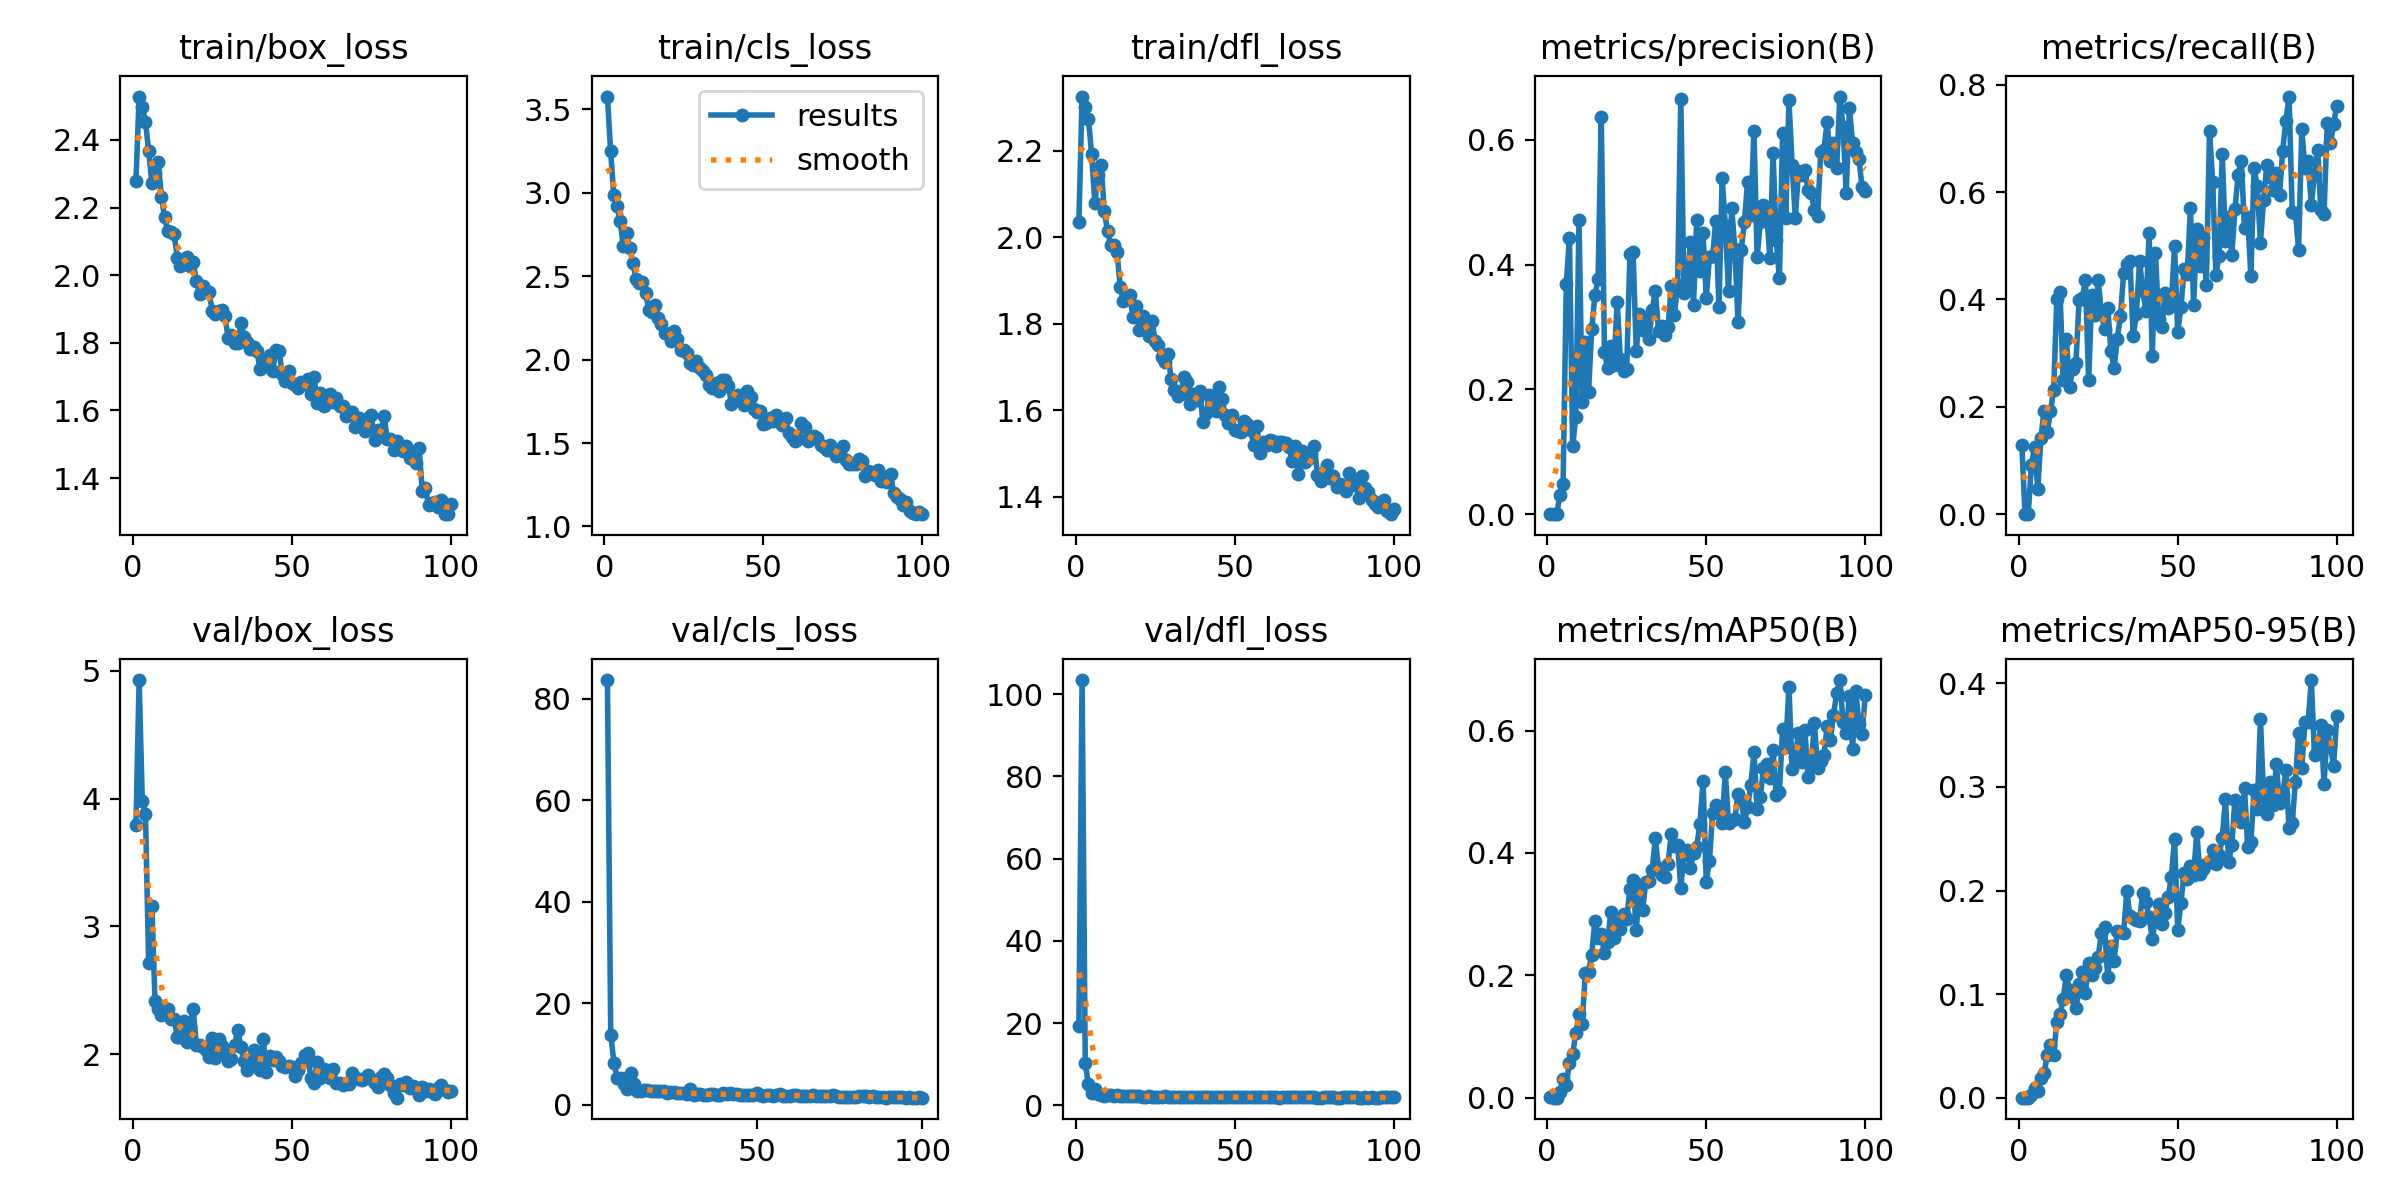


confusion_matrix.png:


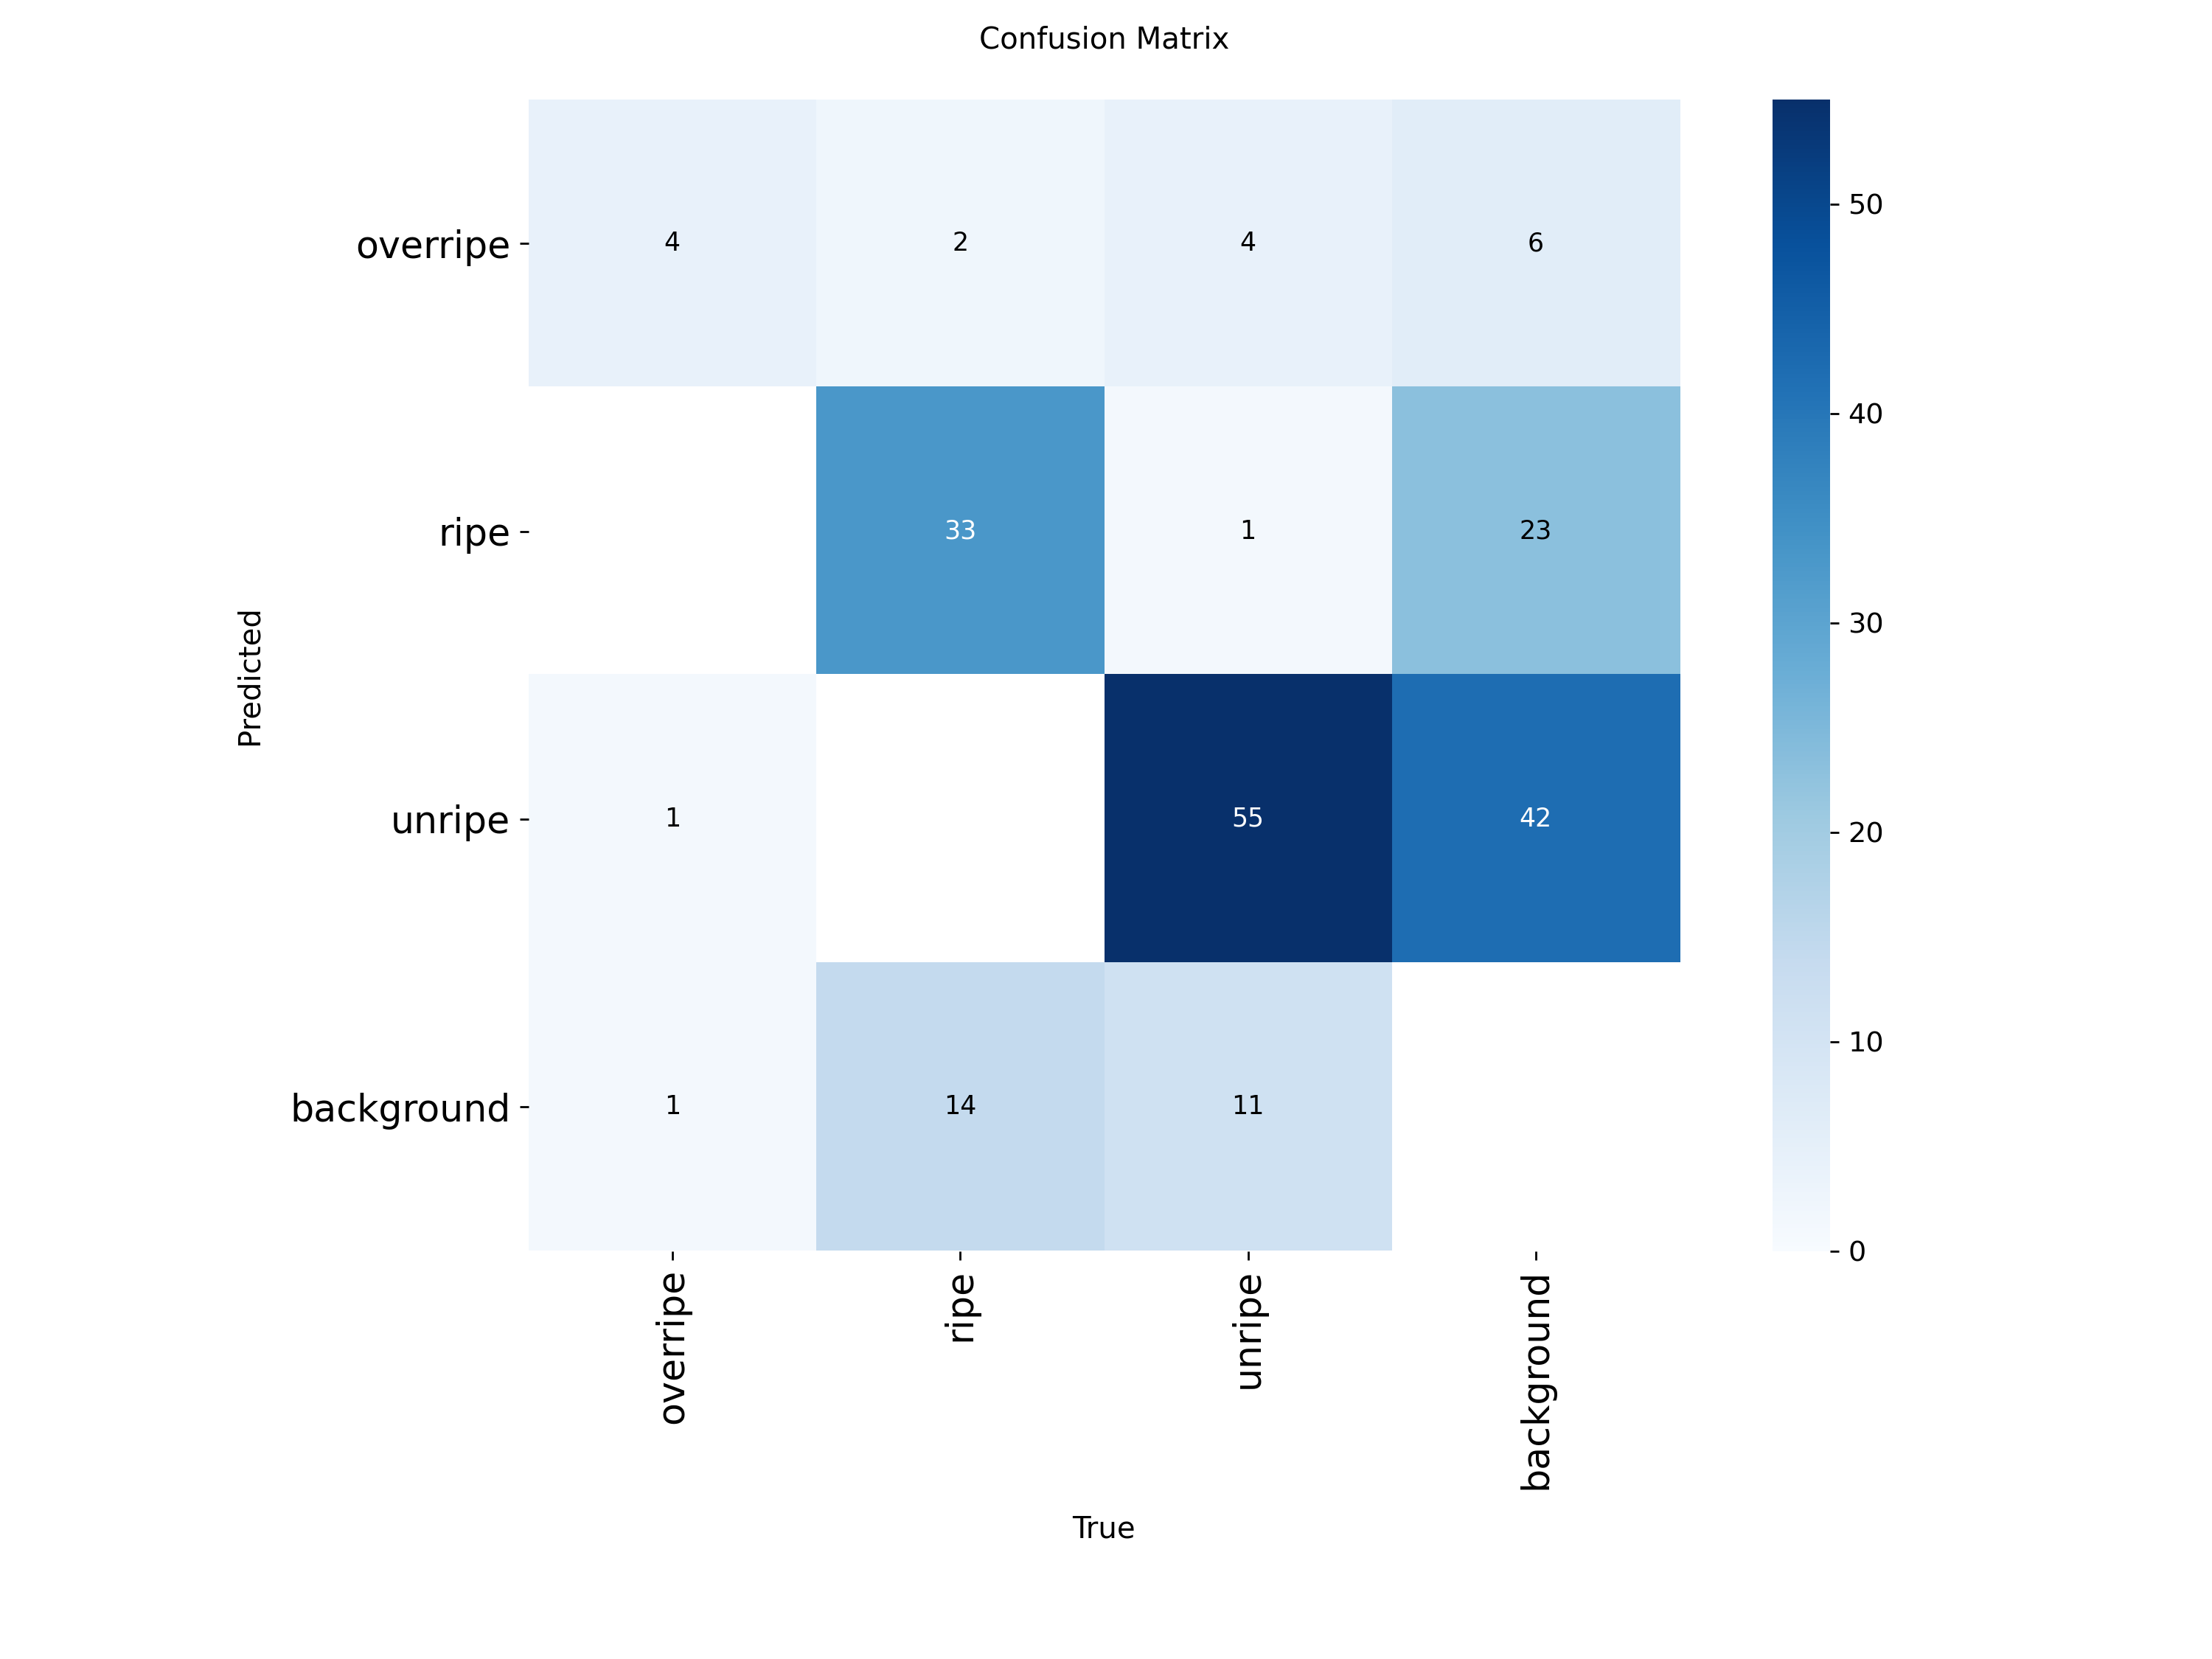


image 1/1 /content/CHILI-RIPENESS-1/test/images/423541746_1390386728291169_2632787625431811978_n_jpg.rf.5a243bffeba5bd8866dcc62fec2b4ac9.jpg: 640x640 1 overripe, 1 unripe, 11.2ms
Speed: 2.4ms preprocess, 11.2ms inference, 25.3ms postprocess per image at shape (1, 3, 640, 640)


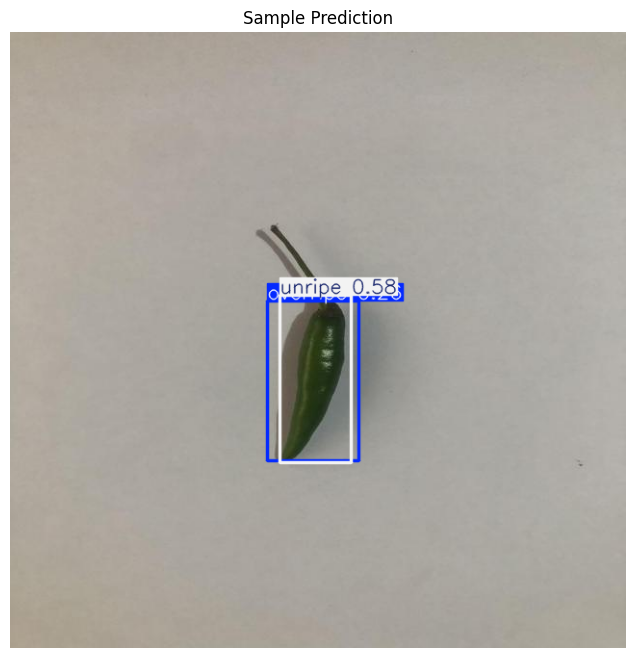


TRAINING SUMMARY
Model: YOLOv8n
Dataset: Chili Ripeness Detection
Classes: overripe, ripe, unripe
Epochs: 100
Image Size: 640
Batch Size: 16
Best model path: chili_ripeness_training/chili_yolov8_exp1/weights/best.pt
Results directory: chili_ripeness_training/chili_yolov8_exp1

Exporting model for deployment...
Ultralytics 8.3.184 🚀 Python-3.12.11 torch-2.8.0+cu126 CPU (Intel Xeon 2.20GHz)
💡 ProTip: Export to OpenVINO format for best performance on Intel hardware. Learn more at https://docs.ultralytics.com/integrations/openvino/

PyTorch: starting from 'chili_ripeness_training/chili_yolov8_exp1/weights/best.pt' with input shape (1, 3, 640, 640) BCHW and output shape(s) (1, 7, 8400) (6.0 MB)
requirements: Ultralytics requirements ['onnx>=1.12.0,<1.18.0', 'onnxslim>=0.1.59', 'onnxruntime-gpu'] not found, attempting AutoUpdate...

requirements: AutoUpdate success ✅ 7.1s
WARNING ⚠️ requirements: Restart runtime or rerun command for updates to take effect


ONNX: starting export with onnx 1

In [11]:

# Test the model on test set if available
if os.path.exists(os.path.join(dataset_path, 'test')):
    test_results = best_model.val(data=data_yaml_path, split='test')
    print(f"Test mAP50: {test_results.box.map50}")
    print(f"Test mAP50-95: {test_results.box.map}")

# Display training plots
results_dir = model.trainer.save_dir
plots_to_show = ['results.png', 'confusion_matrix.png', 'F1_curve.png', 'PR_curve.png']

for plot in plots_to_show:
    plot_path = os.path.join(results_dir, plot)
    if os.path.exists(plot_path):
        print(f"\n{plot}:")
        display(Image(plot_path))

# Test inference on a sample image
test_images_path = os.path.join(dataset_path, 'test/images')
if os.path.exists(test_images_path):
    test_images = [f for f in os.listdir(test_images_path) if f.lower().endswith(('.png', '.jpg', '.jpeg'))]
    if test_images:
        sample_image_path = os.path.join(test_images_path, test_images[0])

        # Run inference
        results = best_model(sample_image_path)

        # Show results
        annotated_frame = results[0].plot()

        # Convert BGR to RGB for matplotlib
        import cv2
        annotated_frame_rgb = cv2.cvtColor(annotated_frame, cv2.COLOR_BGR2RGB)

        plt.figure(figsize=(10, 8))
        plt.imshow(annotated_frame_rgb)
        plt.title("Sample Prediction")
        plt.axis('off')
        plt.show()

print("\n" + "="*50)
print("TRAINING SUMMARY")
print("="*50)
print(f"Model: YOLOv8n")
print(f"Dataset: Chili Ripeness Detection")
print(f"Classes: overripe, ripe, unripe")
print(f"Epochs: {training_params['epochs']}")
print(f"Image Size: {training_params['imgsz']}")
print(f"Batch Size: {training_params['batch']}")
print(f"Best model path: {model.trainer.best}")
print(f"Results directory: {model.trainer.save_dir}")
print("="*50)

# Export model for deployment (optional)
print("\nExporting model for deployment...")
try:
    # Export to ONNX format for deployment
    onnx_path = best_model.export(format='onnx')
    print(f"ONNX model exported to: {onnx_path}")

    # Export to TensorRT if you have CUDA (uncomment if needed)
    # tensorrt_path = best_model.export(format='engine')
    # print(f"TensorRT model exported to: {tensorrt_path}")

    # Export to TensorFlow Lite for mobile deployment (uncomment if needed)
    # tflite_path = best_model.export(format='tflite')
    # print(f"TensorFlow Lite model exported to: {tflite_path}")

except Exception as e:
    print(f"Export failed: {e}")

print("\nTraining and evaluation completed successfully!")


image 1/1 /content/obeerr.jpg: 448x640 1 ripe, 1 unripe, 45.7ms
Speed: 1.6ms preprocess, 45.7ms inference, 1.5ms postprocess per image at shape (1, 3, 448, 640)


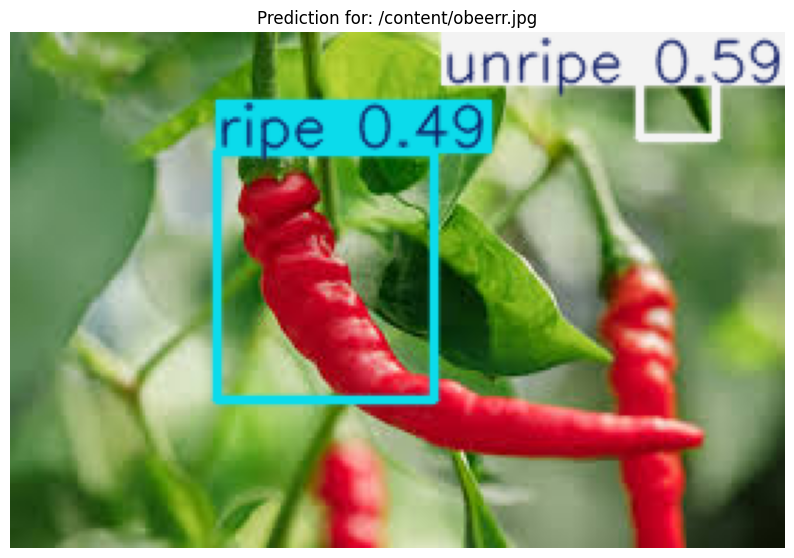

Found 2 detection(s):
Detection 1: unripe (confidence: 0.593)
Detection 2: ripe (confidence: 0.491)


In [22]:
# Simple prediction on single image
import matplotlib.pyplot as plt
import cv2

# Load the best trained model
best_model = YOLO(model.trainer.best)

# Set your image path here
image_path = "/content/obeerr.jpg"  # Change this to your image path

# Run prediction
results = best_model(image_path)

# Display results
annotated_img = results[0].plot()
annotated_img_rgb = cv2.cvtColor(annotated_img, cv2.COLOR_BGR2RGB)

plt.figure(figsize=(10, 8))
plt.imshow(annotated_img_rgb)
plt.title(f"Prediction for: {image_path}")
plt.axis('off')
plt.show()

# Print prediction details
detections = results[0].boxes
if detections is not None and len(detections) > 0:
    print(f"Found {len(detections)} detection(s):")
    for i, detection in enumerate(detections):
        confidence = detection.conf.item()
        class_id = int(detection.cls.item())
        class_name = best_model.names[class_id]
        print(f"Detection {i+1}: {class_name} (confidence: {confidence:.3f})")
else:
    print("No chili detected in the image")

In [24]:
# Save all results from prediction
import os
import json
from datetime import datetime

# Create results directory
results_dir = "prediction_results"
os.makedirs(results_dir, exist_ok=True)

# Get timestamp for unique filename
timestamp = datetime.now().strftime("%Y%m%d_%H%M%S")

# 1. Save annotated image
annotated_image_path = os.path.join(results_dir, f"predicted_image_{timestamp}.jpg")
cv2.imwrite(annotated_image_path, results[0].plot())
print(f"✅ Annotated image saved: {annotated_image_path}")

# 2. Save original image copy
original_image_path = os.path.join(results_dir, f"original_image_{timestamp}.jpg")
original_img = cv2.imread(image_path)
cv2.imwrite(original_image_path, original_img)
print(f"✅ Original image saved: {original_image_path}")

# 3. Save detection results as JSON
detection_data = {
    "image_path": image_path,
    "timestamp": timestamp,
    "model_used": str(best_model.model),
    "total_detections": len(results[0].boxes) if results[0].boxes is not None else 0,
    "detections": []
}

if results[0].boxes is not None and len(results[0].boxes) > 0:
    for i, detection in enumerate(results[0].boxes):
        confidence = float(detection.conf.item())
        class_id = int(detection.cls.item())
        class_name = best_model.names[class_id]
        bbox = detection.xyxy[0].cpu().numpy().tolist()

        detection_info = {
            "detection_id": i + 1,
            "class": class_name,
            "confidence": round(confidence, 3),
            "bounding_box": {
                "x1": round(bbox[0], 1),
                "y1": round(bbox[1], 1),
                "x2": round(bbox[2], 1),
                "y2": round(bbox[3], 1)
            }
        }
        detection_data["detections"].append(detection_info)

json_path = os.path.join(results_dir, f"detection_results_{timestamp}.json")
with open(json_path, 'w') as f:
    json.dump(detection_data, f, indent=2)
print(f"✅ Detection data saved: {json_path}")

# 4. Save results as text file
txt_path = os.path.join(results_dir, f"results_summary_{timestamp}.txt")
with open(txt_path, 'w') as f:
    f.write(f"CHILI RIPENESS DETECTION RESULTS\n")
    f.write(f"=" * 40 + "\n")
    f.write(f"Image: {image_path}\n")
    f.write(f"Date: {datetime.now().strftime('%Y-%m-%d %H:%M:%S')}\n")
    f.write(f"Total detections: {len(results[0].boxes) if results[0].boxes is not None else 0}\n\n")

    if results[0].boxes is not None and len(results[0].boxes) > 0:
        f.write("DETECTIONS:\n")
        for i, detection in enumerate(results[0].boxes):
            confidence = detection.conf.item()
            class_id = int(detection.cls.item())
            class_name = best_model.names[class_id]
            bbox = detection.xyxy[0].cpu().numpy()
            f.write(f"Detection {i+1}:\n")
            f.write(f"  Class: {class_name}\n")
            f.write(f"  Confidence: {confidence:.3f}\n")
            f.write(f"  Bounding box: [{bbox[0]:.1f}, {bbox[1]:.1f}, {bbox[2]:.1f}, {bbox[3]:.1f}]\n\n")
    else:
        f.write("No detections found.\n")

print(f"✅ Text summary saved: {txt_path}")

# 5. Save cropped detections (individual chili images)
if results[0].boxes is not None and len(results[0].boxes) > 0:
    crops_dir = os.path.join(results_dir, f"cropped_detections_{timestamp}")
    os.makedirs(crops_dir, exist_ok=True)

    original_img = cv2.imread(image_path)

    for i, detection in enumerate(results[0].boxes):
        class_id = int(detection.cls.item())
        class_name = best_model.names[class_id]
        confidence = detection.conf.item()
        bbox = detection.xyxy[0].cpu().numpy().astype(int)

        # Crop the detection
        x1, y1, x2, y2 = bbox
        cropped = original_img[y1:y2, x1:x2]

        crop_filename = f"detection_{i+1}_{class_name}_{confidence:.2f}.jpg"
        crop_path = os.path.join(crops_dir, crop_filename)
        cv2.imwrite(crop_path, cropped)

    print(f"✅ Cropped detections saved in: {crops_dir}")

print(f"\n🎉 ALL RESULTS SAVED SUCCESSFULLY!")
print(f"📁 Results directory: {results_dir}")
print(f"📋 Files saved:")
print(f"   • Annotated image: predicted_image_{timestamp}.jpg")
print(f"   • Original image: original_image_{timestamp}.jpg")
print(f"   • JSON data: detection_results_{timestamp}.json")
print(f"   • Text summary: results_summary_{timestamp}.txt")
if results[0].boxes is not None and len(results[0].boxes) > 0:
    print(f"   • Cropped detections folder: cropped_detections_{timestamp}/")
print(f"\n🕐 Timestamp: {timestamp}")

# Download files using Google Colab
from google.colab import files
import zipfile

# Create a zip file with all results
zip_filename = f"chili_prediction_results_{timestamp}.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    # Add all files in results directory
    for root, dirs, files_list in os.walk(results_dir):
        for file in files_list:
            file_path = os.path.join(root, file)
            arcname = os.path.relpath(file_path, results_dir)
            zipf.write(file_path, arcname)

print(f"\n📦 Created zip file: {zip_filename}")
print("⬇️ Downloading zip file...")

# Download the zip file
files.download(zip_filename)

print("✅ Download completed!")

✅ Annotated image saved: prediction_results/predicted_image_20250824_153337.jpg
✅ Original image saved: prediction_results/original_image_20250824_153337.jpg
✅ Detection data saved: prediction_results/detection_results_20250824_153337.json
✅ Text summary saved: prediction_results/results_summary_20250824_153337.txt
✅ Cropped detections saved in: prediction_results/cropped_detections_20250824_153337

🎉 ALL RESULTS SAVED SUCCESSFULLY!
📁 Results directory: prediction_results
📋 Files saved:
   • Annotated image: predicted_image_20250824_153337.jpg
   • Original image: original_image_20250824_153337.jpg
   • JSON data: detection_results_20250824_153337.json
   • Text summary: results_summary_20250824_153337.txt
   • Cropped detections folder: cropped_detections_20250824_153337/

🕐 Timestamp: 20250824_153337

📦 Created zip file: chili_prediction_results_20250824_153337.zip
⬇️ Downloading zip file...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download completed!


In [25]:
# Download all training results (confusion matrix, plots, model weights, etc.)
import os
import zipfile
from google.colab import files

# Get the training results directory
training_results_dir = model.trainer.save_dir
print(f"Training results directory: {training_results_dir}")

# List all files in the training results directory
print("\n📋 Training files available:")
for root, dirs, file_list in os.walk(training_results_dir):
    for file in file_list:
        file_path = os.path.join(root, file)
        relative_path = os.path.relpath(file_path, training_results_dir)
        print(f"   • {relative_path}")

# Create zip file with all training results
zip_filename = "chili_training_results.zip"
with zipfile.ZipFile(zip_filename, 'w') as zipf:
    for root, dirs, file_list in os.walk(training_results_dir):
        for file in file_list:
            file_path = os.path.join(root, file)
            # Create archive name (relative path from training dir)
            arcname = os.path.relpath(file_path, training_results_dir)
            zipf.write(file_path, arcname)

print(f"\n📦 Created zip file: {zip_filename}")
print("⬇️ Downloading training results...")

# Download the zip file
files.download(zip_filename)

print("✅ Download completed!")
print("\n📊 Your zip file contains:")
print("   • best.pt - Best model weights")
print("   • last.pt - Last epoch model weights")
print("   • results.png - Training/validation curves")
print("   • confusion_matrix.png - Confusion matrix")
print("   • F1_curve.png - F1 score curve")
print("   • PR_curve.png - Precision-Recall curve")
print("   • P_curve.png - Precision curve")
print("   • R_curve.png - Recall curve")
print("   • results.csv - Training metrics data")
print("   • args.yaml - Training arguments")
print("   • And more training artifacts...")

Training results directory: chili_ripeness_training/chili_yolov8_exp1

📋 Training files available:
   • BoxPR_curve.png
   • train_batch3420.jpg
   • confusion_matrix.png
   • results.png
   • val_batch2_pred.jpg
   • results.csv
   • labels.jpg
   • train_batch2.jpg
   • confusion_matrix_normalized.png
   • val_batch2_labels.jpg
   • BoxF1_curve.png
   • train_batch1.jpg
   • BoxR_curve.png
   • BoxP_curve.png
   • val_batch1_pred.jpg
   • val_batch0_labels.jpg
   • val_batch0_pred.jpg
   • val_batch1_labels.jpg
   • train_batch3421.jpg
   • labels_correlogram.jpg
   • train_batch0.jpg
   • train_batch3422.jpg
   • args.yaml
   • weights/last.pt
   • weights/best.pt
   • weights/best.onnx

📦 Created zip file: chili_training_results.zip
⬇️ Downloading training results...


<IPython.core.display.Javascript object>

<IPython.core.display.Javascript object>

✅ Download completed!

📊 Your zip file contains:
   • best.pt - Best model weights
   • last.pt - Last epoch model weights
   • results.png - Training/validation curves
   • confusion_matrix.png - Confusion matrix
   • F1_curve.png - F1 score curve
   • PR_curve.png - Precision-Recall curve
   • P_curve.png - Precision curve
   • R_curve.png - Recall curve
   • results.csv - Training metrics data
   • args.yaml - Training arguments
   • And more training artifacts...
